<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Nuevas_Ideas_Politext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Se lee la base original
base=pd.read_csv('/content/drive/MyDrive/par_esp_interventions.csv')

In [21]:
# Se conservan solamente las intervenciones de los partidos PSOE y PP
base=base[(base['party'] == 'PSOE') | (base['party'] == 'PP')]

Preprocesamiento

In [72]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [93]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])

In [28]:
# Elimino de la base las intervenciones del Presidente de la cámara
base=base[(base['role'] != 'PRESIDENTE, PRESIDENTA') | (base['role'] != 'PRESIDENTE DEL CONGRESO DE LOS DIPUTADOS')]

In [29]:
base['tokens']=""

In [30]:
# Esta celda tarda unos 5 minutos en correr
for ind in base.index:
    #elimino puntuación
    non_punctuation = base['intervention'][ind].translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(non_punctuation)

    #elimino stopwords
    tokens=[w for w in word_tokens if not w.lower() in stopwords]

    #stemming
    porter_stemmer = PorterStemmer()
    stemmers = [porter_stemmer.stem(word) for word in tokens]
    base['tokens'][ind] = [stem for stem in stemmers if stem.isalpha() and len(stem) > 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# TFIDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf=TfidfVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [33]:
base['tokens']=base["tokens"].map(' '.join)

In [34]:
vecs = tfidf.fit_transform(base['tokens'])
feature_names = tfidf.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
df.shape

(73707, 200)

In [36]:
df.head()

,actividad económica,administracion pública,administración gener,agencia tributaria,año gobierno,año pasado,cada vez,cambio climático,cinco año,comienza votación,...,vamo votar,vasco pnv,violencia género,votación dio,votación efectuada,voto emitido,voto favor,voto telemático,voy decir,último año
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202446,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.391886,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.322550,0.0,0.0,0.0,0.0


# PP

In [37]:
pp=base[base['party'] == 'PP']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [75]:
vec = cv.fit(pp['tokens']) 

In [76]:
bag_of_words = vec.transform(pp['tokens'])

In [77]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [78]:
print(words_freq[:-40])

[('siguient abstencion', 5989), ('comunidad autónoma', 5472), ('unión europea', 2618), ('administracion pública', 1897), ('president gobierno', 1873), ('izquierda plural', 1845), ('seguridad social', 1744), ('gobierno socialista', 1720), ('gobierno españa', 1693), ('gobierno popular', 1495), ('servicio público', 1360), ('servicio social', 1351), ('pregunta dirigida', 1346), ('creación empleo', 1303), ('presupuesto general', 1301), ('déficit público', 1292), ('crisi económica', 1280), ('diputado don', 1106), ('economía española', 1067), ('unión progreso', 1033), ('progreso democracia', 1033), ('crecimiento económico', 1026), ('unido podemosen', 1001), ('podemen marea', 1000), ('confeder unido', 995), ('podemosen comú', 993), ('comú podemen', 992), ('fijación posicion', 943), ('convergència unió', 928), ('medio ambient', 891), ('puesto trabajo', 877), ('telemático telemático', 862), ('violencia género', 839), ('vasco pnv', 839), ('social igualdad', 838), ('política económica', 811), ('so

In [79]:
tuples = [tuple(x) for x in words_freq]

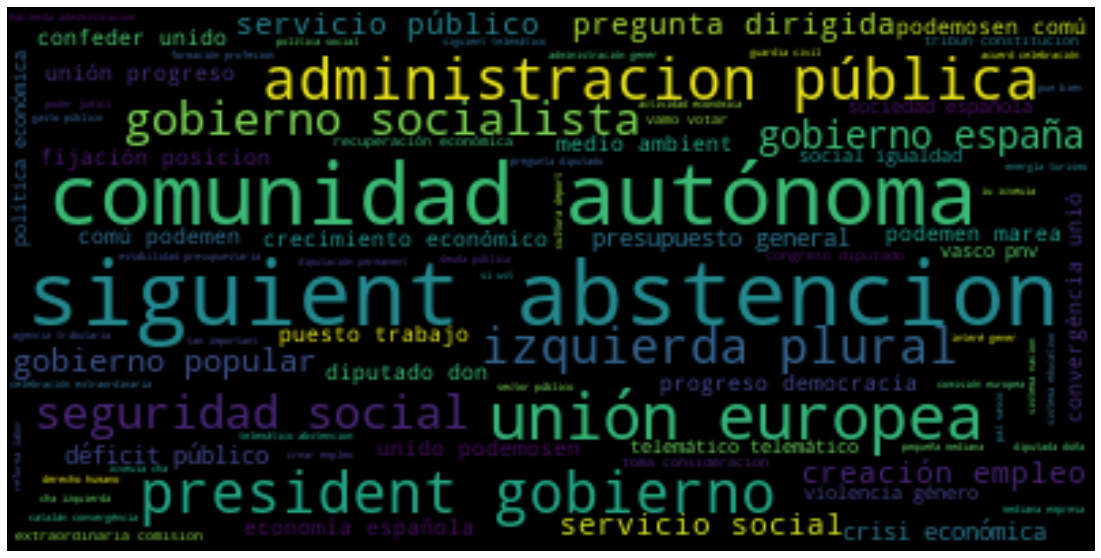

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
names=['bigrama', 'frecuencia']
df = pd.DataFrame(words_freq, columns=names)

In [82]:
df['sobre_bigramas']=df['frecuencia']/len(words_freq)

In [83]:
df['en_discursos']=[sum([row[i] for row in bag_of_words.toarray()]) for i in range(0,len(bag_of_words.toarray()[0]))]

In [84]:
df

,bigrama,frecuencia,sobre_bigramas,en_discursos
0,siguient abstencion,5989,29.945,503
1,comunidad autónoma,5472,27.360,532
2,unión europea,2618,13.090,1897
3,administracion pública,1897,9.485,520
4,president gobierno,1873,9.365,545
...,...,...,...,...
195,diario sesion,279,1.395,763
196,votamo ahora,279,1.395,839
197,economía competitividad,277,1.385,363
198,proposición socialista,276,1.380,839


# PSOE

In [85]:
psoe=base[base['party'] == 'PSOE']

In [101]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)

In [102]:
vec = cv.fit(psoe['tokens']) 

In [103]:
bag_of_words = vec.transform(psoe['tokens'])

In [104]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [105]:
print(words_freq[:-40])

[('comunidad autónoma', 4822), ('unión europea', 3171), ('siguient abstencion', 2136), ('seguridad social', 1507), ('reforma labor', 1071), ('servicio público', 1013), ('política social', 1003), ('sistema financiero', 973), ('crisi económica', 915), ('presupuesto general', 878), ('economía española', 861), ('tribun constitucion', 841), ('violencia género', 769), ('política económica', 740), ('per catalunya', 720), ('unidainiciativa per', 714), ('catalunya verd', 706), ('comisión europea', 704), ('republicanaizquierda unidainiciativa', 691), ('deuda pública', 666), ('administracion pública', 639), ('amnistía fiscal', 603), ('poder judici', 579), ('si ust', 570), ('política fiscal', 553), ('consejo europeo', 549), ('guardia civil', 545), ('puesto trabajo', 529), ('gasto público', 523), ('sociedad española', 521), ('política activa', 509), ('crecimiento económico', 508), ('cambio climático', 500), ('nacion unida', 494), ('entidad financiera', 481), ('derecho humano', 480), ('toma consider

In [106]:
tuples = [tuple(x) for x in words_freq]

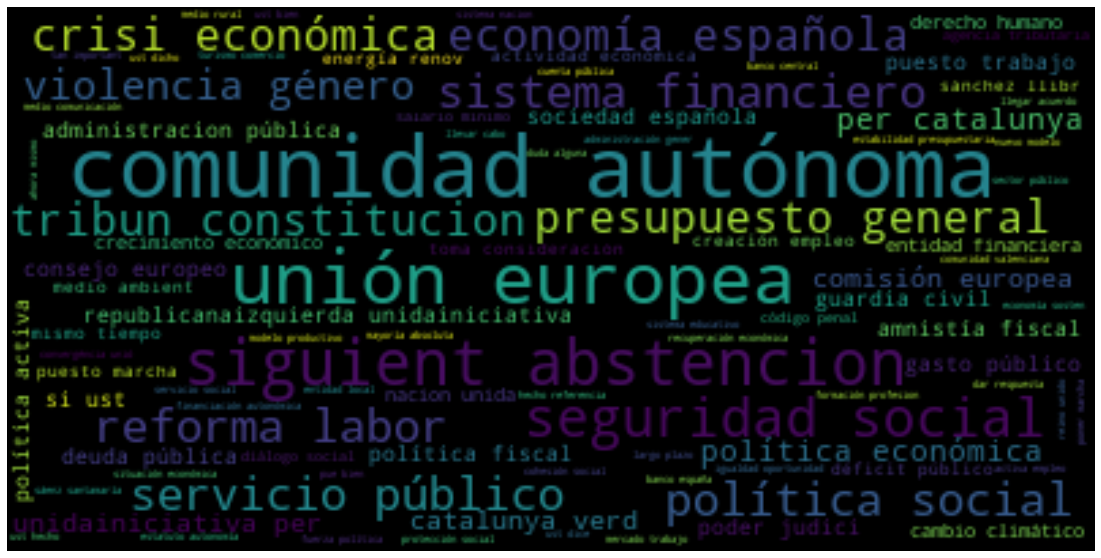

In [107]:
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
names=['bigrama', 'frecuencia']
df = pd.DataFrame(words_freq, columns=names)

In [59]:
df['sobre_bigramas']=df['frecuencia']/len(words_freq)

In [60]:
df['en_discursos']=[sum([row[i] for row in bag_of_words.toarray()]) for i in range(0,len(bag_of_words.toarray()[0]))]

In [61]:
df

,bigrama,frecuencia,sobre_bigramas,en_discursos
0,mucha gracia,14548,72.740,439
1,gracia señor,9282,46.410,639
2,grupo parlamentario,9051,45.255,417
3,señor president,5594,27.970,426
4,gracia señora,5188,25.940,401
...,...,...,...,...
195,gracia señoría,361,1.805,2986
196,sector público,360,1.800,3000
197,llegar acuerdo,359,1.795,527
198,señora fernández,359,1.795,381


# Clasificador

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.loc[:, base.columns != 'party'], base['party'], test_size=0.33, random_state=42)

In [121]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.95, min_df=0.001)
vec = cv.fit(X_train['tokens']) 

In [122]:
train_matrix = vec.fit_transform(X_train['tokens'])
test_matrix = vec.transform(X_test['tokens'])

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=1000)

In [141]:
lr.fit(train_matrix,y_train)

LogisticRegression(max_iter=1000)

In [142]:
predictions = lr.predict(test_matrix )

In [143]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[14784,  7503],
       [  566,  1471]])

In [144]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          PP       0.96      0.66      0.79     22287
        PSOE       0.16      0.72      0.27      2037

    accuracy                           0.67     24324
   macro avg       0.56      0.69      0.53     24324
weighted avg       0.90      0.67      0.74     24324

